In [9]:
Cars = ['maruti-suzuki/','hyundai/','tata/','mahindra/','toyota/','kia/','honda/','mg/','renault/','volkswagen/','skoda/','nissan/','citroen/','jeep/','aston-martin/','audi/','bentley/','bmw/','byd/','ferrari/','force/','ford/','isuzu/','jaguar/','lamborghini/','land-rover/','lexus/','lotus/','maserati/','mclaren/','mercedes-benz/','mini/','ola-electric/','porsche/','rolls-royce/','strom-motors/','tesla/','vinfast/','volvo/','xiaomi/']

### Some of the Required libraries.

In [10]:
import requests

In [14]:
from bs4 import BeautifulSoup

In [ ]:
import re

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

### Requests is the Basic library that is used for Webscraping.

In [ ]:
url = "https://www.cars24.com/new-cars/"
headers = {
    'User -Agent': 'Chrome/131.0.6778.71',
    'Referer' : "https://www.amazon.in"

}
url_page = requests.get(url,headers)
print(url_page)

<Response [200]>


### BeautifulSoup is the popular library that is used for extract information from html code.

In [ ]:
Cars_info = BeautifulSoup(url_page.text)
#print(Cars_info)

### Extract information from html code.

In [ ]:
Name = []
Model = []
Extra_features = []
Seater = []
Fuel_type = []
Safety = []
Price = []
Mileage = []
for j in range(10):
    for i in Cars:
        url_eachcar = f"https://www.cars24.com/new-cars/{i}"
        #print(url_eachcar)
        headers = {
        'User -Agent': 'Chrome/131.0.6778.71',
        'Referer' : "https://www.amazon.in"
    
        }
        url_page_eachcar = requests.get(url_eachcar,headers)
        #print(url_page_eachcar)
        
        eachcar_info = BeautifulSoup(url_page_eachcar.text)
        #print(eachcar_info)
        for i in eachcar_info.find_all("div",class_="makePage_grid-container__nrz3f flex flex-wrap"):
            #print(i)
            cars_info = i.find("div","makePage_grid-item__GwMAH flex-col items-center flex").text
            #print(cars_info)
            name = eachcar_info.find("h2","font-medium text-nobleGrey text-base").text
            if name:
                Name.append(name)
                #print(name)
            else:
                Name.append(np.nan)
            price = re.findall("\\₹\\s(\\d+\\.\\d+L)\\s\\-\\s(\\d+\\.\\d+L)",cars_info)
            if price:
                Price.append(price[0])
                #print(price)
            else:
                Price.append(np.nan)
            safety = re.findall("\\*\\d+\\s\\Safety",cars_info)
            if safety:
                Safety.append(safety[0])
                #print(safety)
            else:
                Safety.append(np.nan)
            fuel_type = re.findall("\\Safety(.+)\\,\\s(.+)\\sFuel Type",cars_info)
            if fuel_type:
                Fuel_type.append(fuel_type[0])
                #print(fuel_type)
            else:
                Fuel_type.append(np.nan)
            seater = re.findall("\\d+\\s\\Seater",cars_info)
            if seater:
                Seater.append(seater[0])
            else:
                Seater.append(np.nan)
            model = eachcar_info.find("span","font-medium text-[18px] flex text-black text-nowrap").text
            if model:
                #print(model)
                Model.append(model)
            else:
                Model.append(np.nan)
            mileage = re.findall("\\d+\\-\\d+\\skm/lMileage",cars_info)
            if mileage:
                Mileage.append(mileage)
                #print(mileage)
            else:
                Mileage.append(np.nan)
            extra_features = eachcar_info.find("a","key-specs block px-5 pt-5 pb-3 min-h-28").text
            if extra_features:
                #print(extra_features)
                Extra_features.append(extra_features)
            else:
                Extra_features.append(np.nan)
#length of each column
#print(len(Name))
#print(len(Model))
#print(len(Extra_features))
#print(len(Seater))
#print(len(Fuel_type))
#print(len(Safety))
#print(len(Price))
#print(len(Mileage))

### Creating DataFrame

In [ ]:
Cars_dict = {"Name":Name,
             "Model":Model,
             "Extra_features":Extra_features,
             "Seater":Seater,
             "Fuel_type":Fuel_type,
             "Safety":Safety,
             "Price":Price,
             "Mileage":Mileage}
Cars_df = pd.DataFrame(Cars_dict)
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,Price,Mileage
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5 Seater,"(CNG, Petrol)",*2 Safety,"(4.0L, 6.0L)",NaN
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5 Seater,"(CNG, Petrol)",*2 Safety,"(5.9L, 8.6L)",NaN


### Replacing NaN values with Zero.

In [ ]:
Cars_df.fillna(value = 0,inplace=True)

### Checking the sum of NaN values.

In [ ]:
Cars_df.isna().sum()

Name              0
Model             0
Extra_features    0
Seater            0
Fuel_type         0
Safety            0
Price             0
Mileage           0
dtype: int64

In [ ]:
print(len(Cars_df))

400


In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,Price,Mileage
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5 Seater,"(CNG, Petrol)",*2 Safety,"(4.0L, 6.0L)",0
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5 Seater,"(CNG, Petrol)",*2 Safety,"(5.9L, 8.6L)",0


In [ ]:
Cars_df['Seater']=Cars_df['Seater'].apply(lambda x: x.replace("Seater","") if isinstance(x, str) else x).astype(int)

In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,Price,Mileage
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5,"(CNG, Petrol)",*2 Safety,"(4.0L, 6.0L)",0
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5,"(CNG, Petrol)",*2 Safety,"(5.9L, 8.6L)",0


### Filtering the Data

In [ ]:
import re

In [ ]:
new = []
for j in range(len(Cars_df)):
    input_string = str(Cars_df['Price'][j])
    prices = re.findall(r'(\d+\.\d+)L', input_string)
    prices = [float(price) for price in prices]
    new.append(prices)

In [ ]:
Cars_df['Price_car'] = new

In [ ]:
Cars_df['Price_car']

0        [4.0, 6.0]
1        [5.9, 8.6]
2        [5.0, 8.8]
3       [7.8, 15.5]
4       [6.9, 10.0]
           ...     
395              []
396    [60.0, 70.0]
397     [9.0, 12.0]
398              []
399    [25.0, 30.0]
Name: Price_car, Length: 400, dtype: object

In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,Price,Mileage,Price_car
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5,"(CNG, Petrol)",*2 Safety,"(4.0L, 6.0L)",0,"[4.0, 6.0]"
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5,"(CNG, Petrol)",*2 Safety,"(5.9L, 8.6L)",0,"[5.9, 8.6]"


In [ ]:
new2 = []
for k in range(len(Cars_df)):
    if Cars_df['Price_car'][k] == []:
        new2.append(0)
    else:
        new2.append(Cars_df['Price_car'][k][1])

In [ ]:
Cars_df['max_Price_in_Lakh'] = new2

In [ ]:
new3 = []
for l in range(len(Cars_df)):
    if Cars_df['Price_car'][l] == []:
        new3.append(0)
    else:
        new3.append(Cars_df['Price_car'][l][0])

In [ ]:
Cars_df['min_Price_in_Lakh'] = new3

In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,Price,Mileage,Price_car,max_Price_in_Lakh,min_Price_in_Lakh
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5,"(CNG, Petrol)",*2 Safety,"(4.0L, 6.0L)",0,"[4.0, 6.0]",6.0,4.0
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5,"(CNG, Petrol)",*2 Safety,"(5.9L, 8.6L)",0,"[5.9, 8.6]",8.6,5.9


In [ ]:
Cars_df.drop(columns=['Price','Price_car'],inplace=True)

In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,Mileage,max_Price_in_Lakh,min_Price_in_Lakh
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5,"(CNG, Petrol)",*2 Safety,0,6.0,4.0
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5,"(CNG, Petrol)",*2 Safety,0,8.6,5.9


In [ ]:
new4 = []
for m in range(len(Cars_df)):
    input_string1 = str(Cars_df['Mileage'][m])
    numbers = re.findall(r'\d+', input_string1)
    result_list = [int(num) for num in numbers]
    new4.append(result_list)

In [ ]:
Cars_df['car_m'] = new4

In [ ]:
new5 = []
for n in range(len(Cars_df)):
    if Cars_df['car_m'][n] == [0]:
        new5.append(0)
    else:
        new5.append(Cars_df['car_m'][n][0])

In [ ]:
Cars_df['min_car_Mileage'] = new5

In [ ]:
new6 = []
for o in range(len(Cars_df)):
    if Cars_df['car_m'][o] == [0]:
        new6.append(0)
    else:
        new6.append(Cars_df['car_m'][o][1])

In [ ]:
Cars_df['max_car_Mileage'] = new6

In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,Mileage,max_Price_in_Lakh,min_Price_in_Lakh,car_m,min_car_Mileage,max_car_Mileage
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5,"(CNG, Petrol)",*2 Safety,0,6.0,4.0,[0],0,0
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5,"(CNG, Petrol)",*2 Safety,0,8.6,5.9,[0],0,0


In [ ]:
Cars_df.drop(columns=['Mileage','car_m'],inplace=True)

In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5,"(CNG, Petrol)",*2 Safety,6.0,4.0,0,0
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5,"(CNG, Petrol)",*2 Safety,8.6,5.9,0,0


In [ ]:
new7 = []
for p in range(len(Cars_df)):
    input = str(Cars_df['Safety'][p])
    y = re.findall(r'\d+',input)
    new7.append(y)    

In [ ]:
Cars_df['Safety_rating'] = new7

In [ ]:
new8 = []
for q in range(len(Cars_df)):
    new8.append(Cars_df['Safety_rating'][q][0])

In [ ]:
Cars_df['Safety_ratings'] = new8

In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,Safety,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_rating,Safety_ratings
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5,"(CNG, Petrol)",*2 Safety,6.0,4.0,0,0,[2],2
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5,"(CNG, Petrol)",*2 Safety,8.6,5.9,0,0,[2],2


In [ ]:
Cars_df.drop(columns = ['Safety_rating','Safety'],inplace=True)

In [ ]:
Cars_df.head(2)

,Name,Model,Extra_features,Seater,Fuel_type,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings
0,Maruti Suzuki Alto K10,Alto K10,Affordable hatchbackPopular choice in the hatc...,5,"(CNG, Petrol)",6.0,4.0,0,0,2
1,Hyundai Grand i10 Nios,Grand i10 Nios,Fun & sporty hatchbackSpacious cabinFeature-ri...,5,"(CNG, Petrol)",8.6,5.9,0,0,2


In [ ]:
new9 = []
new10 = []
for r in range(len(Cars_df)):
    if Cars_df['Fuel_type'][r] == 0:
        new9.append(0)
        new10.append(0)
    else:
        new9.append(Cars_df['Fuel_type'][r][0])
        new10.append(Cars_df['Fuel_type'][r][1])

In [ ]:
Cars_df["fuel_type1"] = new9
Cars_df["fuel_type2"] = new10

In [ ]:
Cars_df.drop(columns=['Fuel_type'],inplace=True)

In [ ]:
Cars_df.drop(columns=['Extra_features'],inplace=True)

In [ ]:
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,0,0,2,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,0,0,2,CNG,Petrol


In [ ]:
Cars_df.to_csv('Cars.csv')

In [ ]:
Cars_df = pd.read_csv('Cars.csv',na_values=['0'])

In [ ]:
Cars_df.head(2)

,Unnamed: 0,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,NaN,Maruti Suzuki Alto K10,Alto K10,5.0,6.0,4.0,NaN,NaN,2.0,CNG,Petrol
1,1.0,Hyundai Grand i10 Nios,Grand i10 Nios,5.0,8.6,5.9,NaN,NaN,2.0,CNG,Petrol


In [ ]:
Cars_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5.0,6.0,4.0,NaN,NaN,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5.0,8.6,5.9,NaN,NaN,2.0,CNG,Petrol


In [ ]:
Cars_df['Seater'] = Cars_df['Seater'].astype('Int64')

In [ ]:
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,NaN,NaN,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,NaN,NaN,2.0,CNG,Petrol


In [ ]:
Cars_df['Seater'].mode()[0]

5

In [ ]:
Cars_df['Seater']= Cars_df['Seater'].fillna(value=5)

In [ ]:
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,NaN,NaN,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,NaN,NaN,2.0,CNG,Petrol


In [ ]:
Cars_df['max_Price_in_Lakh'].mode()[0]

6.0

In [ ]:
Cars_df['max_Price_in_Lakh'] = Cars_df['max_Price_in_Lakh'].fillna(value=6.0)

In [ ]:
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,NaN,NaN,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,NaN,NaN,2.0,CNG,Petrol


In [ ]:
Cars_df['min_Price_in_Lakh'].mode()[0]

8.0

In [ ]:
Cars_df['min_Price_in_Lakh'] = Cars_df['min_Price_in_Lakh'].fillna(value = 8.0)

In [ ]:
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,NaN,NaN,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,NaN,NaN,2.0,CNG,Petrol


In [ ]:
Cars_df['min_car_Mileage'].mode()[0]

10.0

In [ ]:
Cars_df['min_car_Mileage'] = Cars_df['min_car_Mileage'].fillna(value=10.0)

In [ ]:
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,10.0,NaN,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,10.0,NaN,2.0,CNG,Petrol


In [ ]:
Cars_df['max_car_Mileage'].mode()[0]

22.0

In [ ]:
Cars_df['max_car_Mileage'] = Cars_df['max_car_Mileage'].fillna(value=22.0)
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,10.0,22.0,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,10.0,22.0,2.0,CNG,Petrol


In [ ]:
Cars_df['Safety_ratings'].mode()[0]

2.0

In [ ]:
Cars_df['Safety_ratings'] = Cars_df['Safety_ratings'].fillna(value = 2.0)
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,10.0,22.0,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,10.0,22.0,2.0,CNG,Petrol


In [ ]:
Cars_df['fuel_type1'].mode()[0]

'CNG'

In [ ]:
Cars_df['fuel_type1'] = Cars_df['fuel_type1'].fillna(value='CNG')
Cars_df.head(2)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,10.0,22.0,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,10.0,22.0,2.0,CNG,Petrol


In [ ]:
Cars_df['fuel_type2'].mode()[0]

'Petrol'

In [ ]:
Cars_df['fuel_type2'] = Cars_df['fuel_type2'].fillna(value='Petrol')

### Data After Cleaning.

In [ ]:
Cars_df.head(10)

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
0,Maruti Suzuki Alto K10,Alto K10,5,6.0,4.0,10.0,22.0,2.0,CNG,Petrol
1,Hyundai Grand i10 Nios,Grand i10 Nios,5,8.6,5.9,10.0,22.0,2.0,CNG,Petrol
2,Tata Tiago,Tiago,5,8.8,5.0,10.0,22.0,4.0,CNG,Petrol
3,Mahindra XUV 3XO,XUV 3XO,5,15.5,7.8,18.0,21.0,2.0,CNG,Petrol
4,Toyota Glanza,Glanza,5,10.0,6.9,22.0,22.0,2.0,CNG,Petrol
5,Kia Sonet,Sonet,5,15.8,8.0,18.0,22.0,2.0,CNG,Petrol
6,Honda Amaze,Amaze,5,10.9,8.0,18.0,19.0,2.0,CNG,Petrol
7,MG Comet EV,Comet EV,5,9.5,7.0,10.0,22.0,2.0,CNG,Petrol
8,Renault KWID,KWID,5,6.5,4.7,21.0,22.0,2.0,CNG,Petrol
9,Volkswagen Virtus,Virtus,5,19.4,11.6,10.0,22.0,5.0,CNG,Petrol


In [ ]:
Cars_df.isnull().sum()

Name                 0
Model                0
Seater               0
max_Price_in_Lakh    0
min_Price_in_Lakh    0
min_car_Mileage      0
max_car_Mileage      0
Safety_ratings       0
fuel_type1           0
fuel_type2           0
dtype: int64

In [ ]:
Cars_df['Seater'].value_counts()

Seater
5    300
4     40
2     40
7     20
Name: count, dtype: Int64

In [ ]:
Cars_df['max_Price_in_Lakh'].value_counts()

max_Price_in_Lakh
6.0     160
32.4     10
12.0     10
70.0     10
37.0     10
48.5     10
67.9     10
11.4     10
50.0     10
29.9     10
45.5     10
51.9     10
9.3      10
8.6      10
11.5     10
14.4     10
19.4     10
6.5      10
9.5      10
10.9     10
15.8     10
10.0     10
15.5     10
8.8      10
30.0     10
Name: count, dtype: int64

In [ ]:
Cars_df['min_Price_in_Lakh'].value_counts()

min_Price_in_Lakh
8.0     170
4.0      10
43.9     10
9.0      10
60.0     10
30.0     10
45.8     10
61.6     10
10.6     10
35.0     10
26.9     10
43.5     10
19.0     10
5.9      10
6.2      10
6.0      10
7.9      10
11.6     10
4.7      10
7.0      10
6.9      10
7.8      10
5.0      10
25.0     10
Name: count, dtype: int64

In [ ]:
Cars_df['min_car_Mileage'].value_counts()

min_car_Mileage
10.0    290
18.0     30
17.0     20
14.0     20
22.0     10
21.0     10
15.0     10
6.0      10
Name: count, dtype: int64

In [ ]:
Cars_df['max_car_Mileage'].value_counts()

max_car_Mileage
22.0    290
19.0     20
18.0     20
21.0     10
17.0     10
12.0     10
16.0     10
14.0     10
20.0     10
10.0     10
Name: count, dtype: int64

In [ ]:
Cars_df['Safety_ratings'].value_counts()

Safety_ratings
2.0    380
4.0     10
5.0     10
Name: count, dtype: int64

In [ ]:
Cars_df['fuel_type1'].value_counts()

fuel_type1
CNG    400
Name: count, dtype: int64

In [ ]:
Cars_df['fuel_type2'].value_counts()

fuel_type2
Petrol    400
Name: count, dtype: int64

### Information about the Data.

In [ ]:
Cars_df.describe()

,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings
count,400.0,400.000000,400.000000,400.000000,400.000000,400.000000
mean,4.7,18.067500,15.482500,11.750000,20.550000,2.125000
std,1.054885,17.999532,15.321188,3.559378,2.918698,0.556911
min,2.0,6.000000,4.000000,6.000000,10.000000,2.000000
25%,5.0,6.000000,7.975000,10.000000,20.750000,2.000000
50%,5.0,9.400000,8.000000,10.000000,22.000000,2.000000
75%,5.0,22.025000,13.450000,11.000000,22.000000,2.000000
max,7.0,70.000000,61.600000,22.000000,22.000000,5.000000


In [ ]:
Cars_df.describe(include = 'all')

,Name,Model,Seater,max_Price_in_Lakh,min_Price_in_Lakh,min_car_Mileage,max_car_Mileage,Safety_ratings,fuel_type1,fuel_type2
count,400,400,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400,400
unique,40,40,<NA>,NaN,NaN,NaN,NaN,NaN,1,1
top,Maruti Suzuki Alto K10,Alto K10,<NA>,NaN,NaN,NaN,NaN,NaN,CNG,Petrol
freq,10,10,<NA>,NaN,NaN,NaN,NaN,NaN,400,400
mean,NaN,NaN,4.7,18.067500,15.482500,11.750000,20.550000,2.125000,NaN,NaN
std,NaN,NaN,1.054885,17.999532,15.321188,3.559378,2.918698,0.556911,NaN,NaN
min,NaN,NaN,2.0,6.000000,4.000000,6.000000,10.000000,2.000000,NaN,NaN
25%,NaN,NaN,5.0,6.000000,7.975000,10.000000,20.750000,2.000000,NaN,NaN
50%,NaN,NaN,5.0,9.400000,8.000000,10.000000,22.000000,2.000000,NaN,NaN
75%,NaN,NaN,5.0,22.025000,13.450000,11.000000,22.000000,2.000000,NaN,NaN


### EXPLORATORT DATA ANALYSIS

## univariate analysis


### Categorical data (qualitative)

### Required libraries for ploting the graphs.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

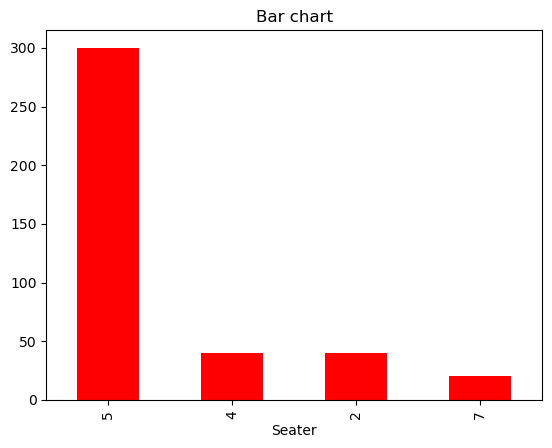

In [ ]:
# Bar graph
Cars_df['Seater'].value_counts().plot(kind='bar',color = 'red')
plt.title('Bar chart')
plt.show()

In [ ]:
Cars_df['Seater'].value_counts()

Seater
5    300
4     40
2     40
7     20
Name: count, dtype: Int64

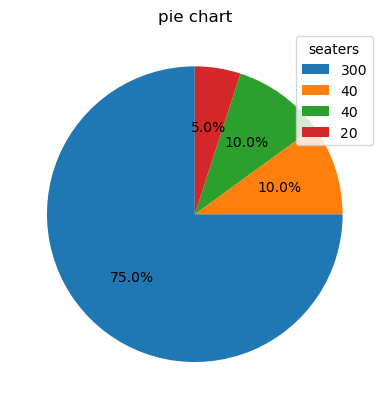

In [ ]:
# Pie chart
plt.pie(Cars_df['Seater'].value_counts(),autopct='%1.1f%%',startangle=90)
plt.legend(Cars_df['Seater'].value_counts(), title="seaters", loc="upper right")
plt.title("pie chart")
plt.show()

### numerical data (quantitative)

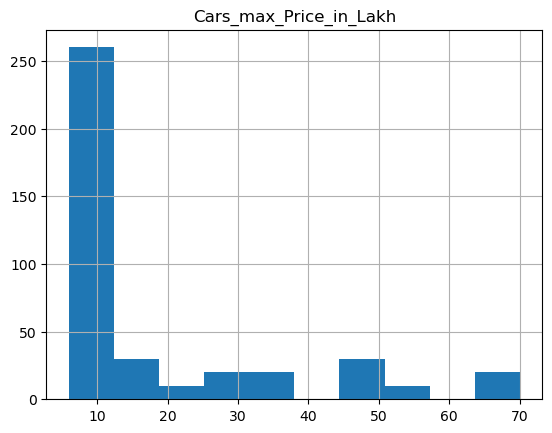

In [ ]:
# Histogram with grids.
Cars_df.max_Price_in_Lakh.hist()
plt.title("Cars_max_Price_in_Lakh")
plt.show()

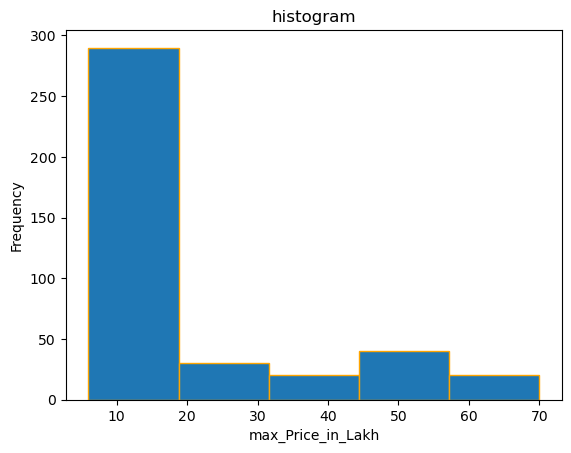

In [ ]:
# Histogram
Cars_df['max_Price_in_Lakh'].plot(kind='hist',bins = 5,edgecolor='orange')
plt.xlabel('max_Price_in_Lakh')
plt.title("histogram")
plt.show()

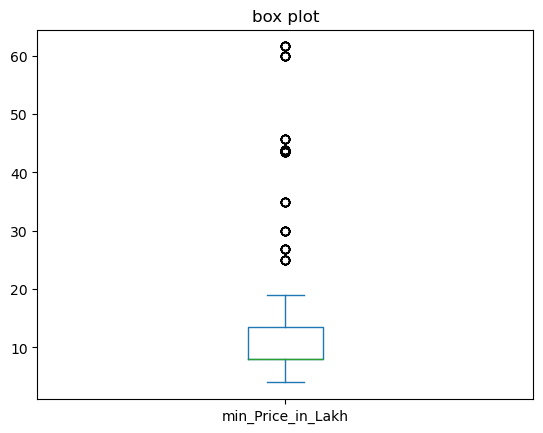

In [ ]:
# Box plot
Cars_df['min_Price_in_Lakh'].plot(kind='box')
plt.title("box plot")
plt.show()

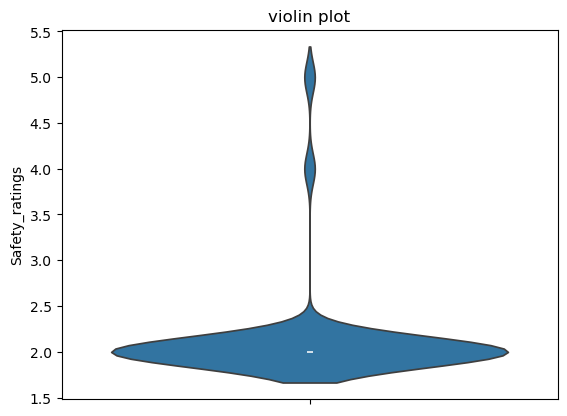

In [ ]:
# Violin plot
sns.violinplot(Cars_df["Safety_ratings"])
plt.title("violin plot")
plt.show()

## bivariate analysis

### Continuous  and Categorical variables (groupby, pivot table)

In [ ]:
group = Cars_df.groupby(by = 'Seater')['max_Price_in_Lakh'].max()
group

Seater
2    11.4
4     6.0
5    70.0
7    50.0
Name: max_Price_in_Lakh, dtype: float64

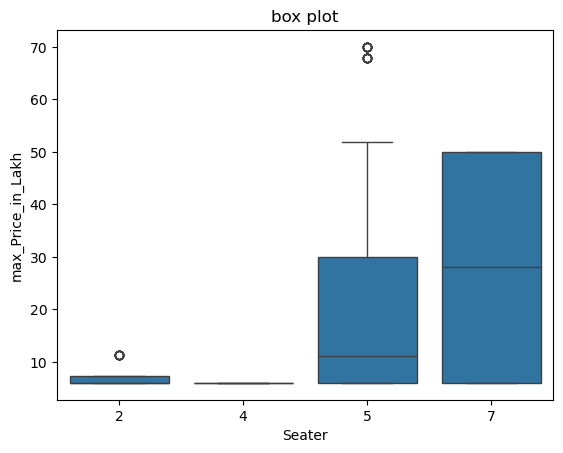

In [ ]:
# Box plot
sns.boxplot(x=Cars_df['Seater'], y=Cars_df['max_Price_in_Lakh'])
plt.title("box plot")
plt.show()

In [ ]:
Cars_df.pivot_table(values='max_Price_in_Lakh',columns='max_car_Mileage',aggfunc='mean')

max_car_Mileage,10.0,12.0,14.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0
max_Price_in_Lakh,6.0,6.0,6.0,11.4,32.4,29.95,11.2,48.5,15.5,17.744828


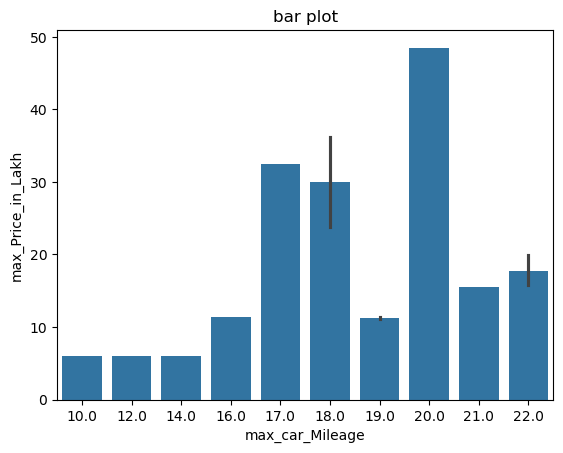

In [ ]:
# Bar plot
sns.barplot(x=Cars_df['max_car_Mileage'],y=Cars_df['max_Price_in_Lakh'])
plt.title("bar plot")
plt.show()

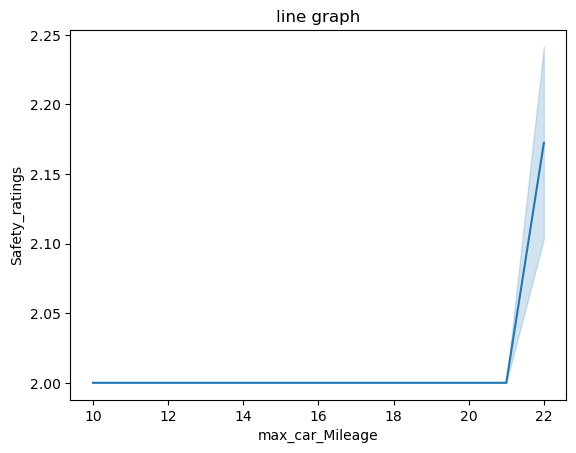

In [ ]:
# Line graph
sns.lineplot(x=Cars_df['max_car_Mileage'],y=Cars_df['Safety_ratings'])
plt.title("line graph")
plt.show()

## Continuous  to Continuous variable  (correlation plot) 

In [ ]:
Cars_df[["min_Price_in_Lakh","min_car_Mileage"]].corr()

,min_Price_in_Lakh,min_car_Mileage
min_Price_in_Lakh,1.000000,-0.063778
min_car_Mileage,-0.063778,1.000000


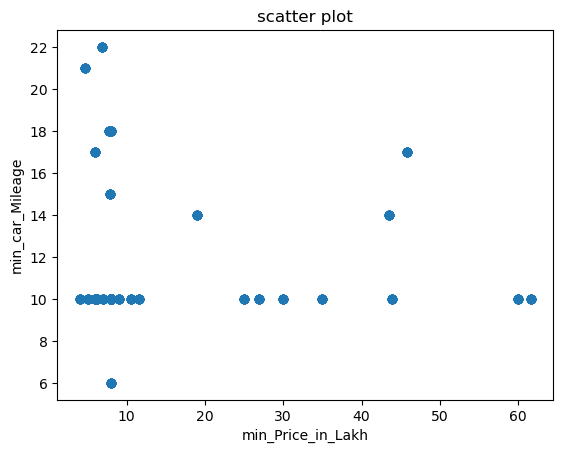

In [ ]:
# Scatter plot
plt.scatter(Cars_df["min_Price_in_Lakh"],Cars_df["min_car_Mileage"])
plt.xlabel("min_Price_in_Lakh")
plt.ylabel("min_car_Mileage")
plt.title("scatter plot")
plt.show()

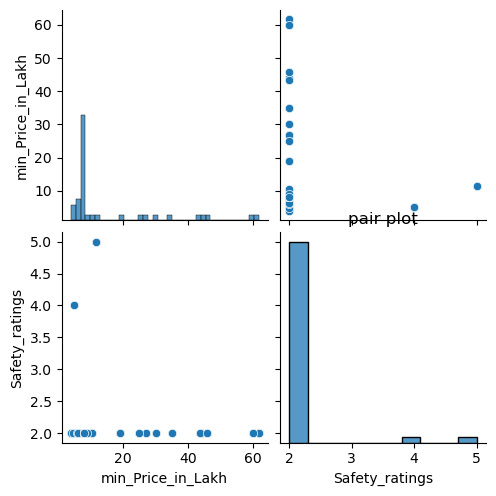

In [ ]:
# Pair plot
sns.pairplot(data = Cars_df, vars = ["min_Price_in_Lakh","Safety_ratings"])
plt.title("pair plot")
plt.show()

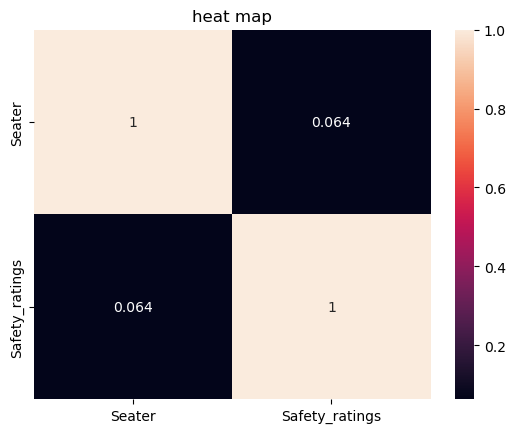

In [ ]:
# Heat map
sns.heatmap(Cars_df[["Seater","Safety_ratings"]].corr(),annot = True)
plt.title("heat map")
plt.show()

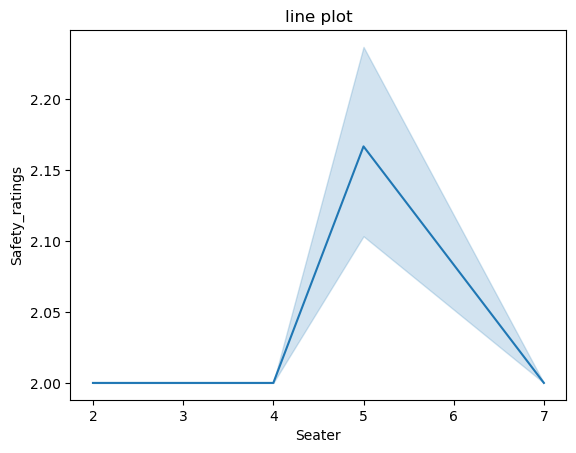

In [ ]:
# Line graph
sns.lineplot(x=Cars_df["Seater"],y=Cars_df["Safety_ratings"])
plt.title("line plot")
plt.show()

### Categorical to Categorical variables  (crosstab) 


In [ ]:
cc = pd.crosstab(Cars_df["Seater"],Cars_df["Model"])

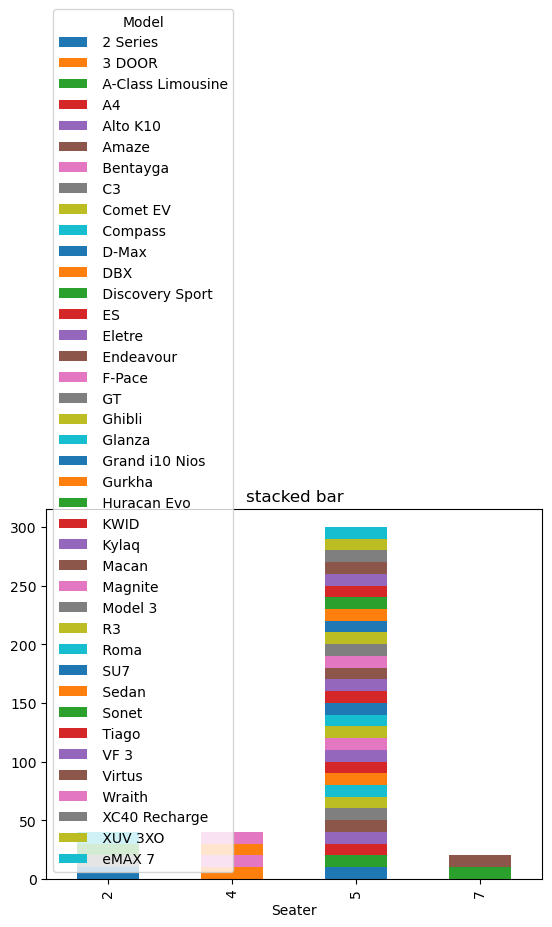

In [ ]:
# Stacked bar
cc.plot(kind='bar',stacked=True)
plt.title("stacked bar")
plt.show()

## multivariate analysis

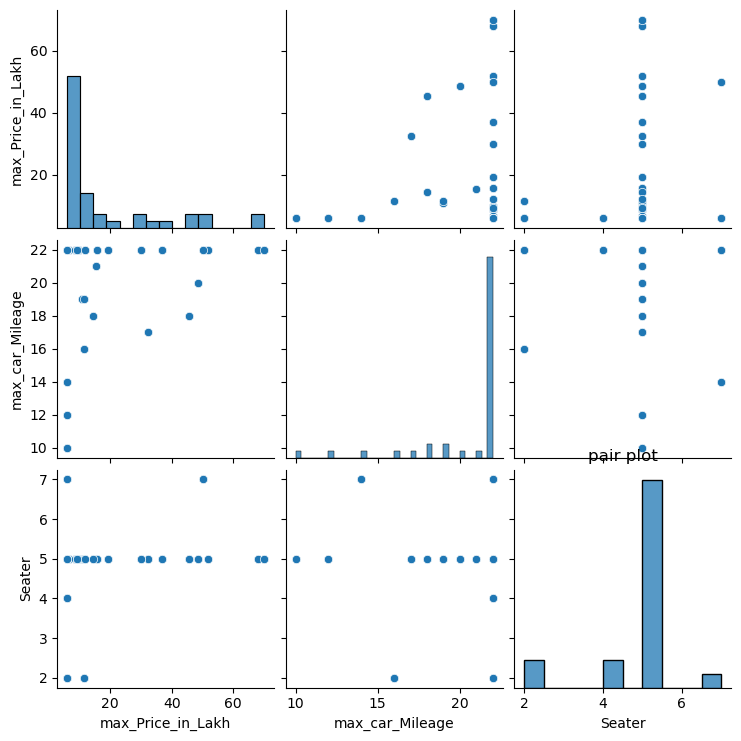

In [ ]:
# Pair plot
sns.pairplot(data= Cars_df, vars = ["max_Price_in_Lakh","max_car_Mileage","Seater"])
plt.title("pair plot")
plt.show()

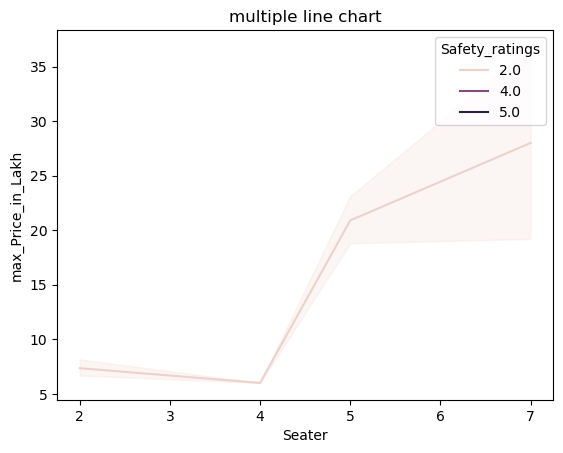

In [ ]:
# Multiple line chart
sns.lineplot(x=Cars_df["Seater"],y=Cars_df["max_Price_in_Lakh"],hue=Cars_df["Safety_ratings"])
plt.title("multiple line chart")
plt.show()

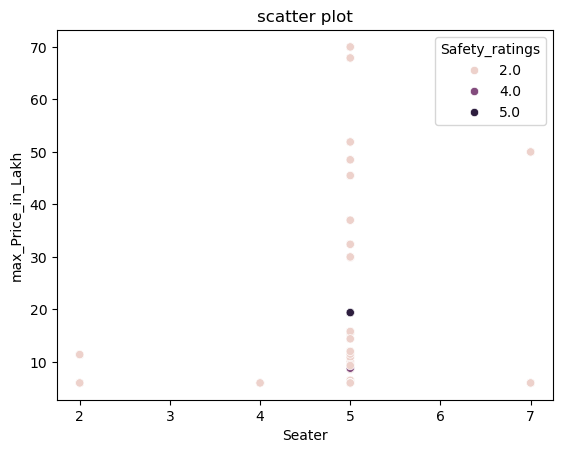

In [ ]:
# Scatter plot
sns.scatterplot(x=Cars_df["Seater"],y=Cars_df["max_Price_in_Lakh"],hue=Cars_df["Safety_ratings"])
plt.title("scatter plot")
plt.show()

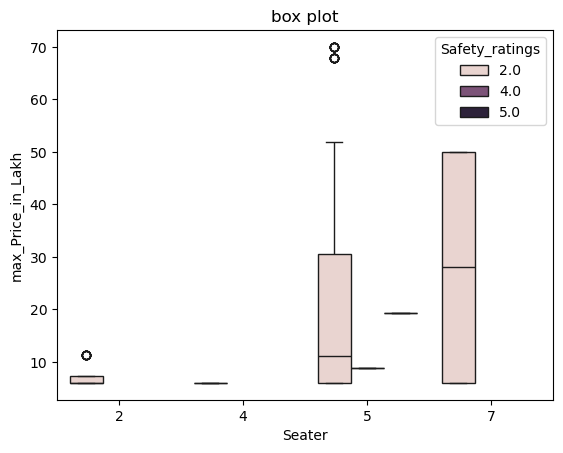

In [ ]:
# Box plot
sns.boxplot(x=Cars_df["Seater"],y=Cars_df["max_Price_in_Lakh"],hue=Cars_df["Safety_ratings"])
plt.title("box plot")
plt.show()

### The analysis reveals that several key factors significantly influence the pricing of used cars.
